In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

In [7]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


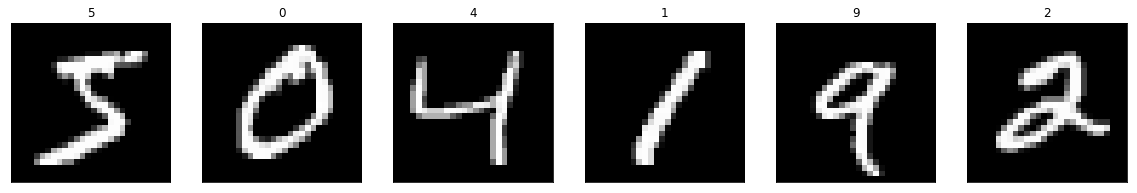

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(str(y_train[i]))

## Preproccessing and data exploration
One-hot encode y_train og y_test. 
Set features to between 0-1 by dividing with 255

In [9]:
from keras.utils import to_categorical
np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
input_shape = x_train.shape
print(input_shape)
print(y_train[0:4])
#print(x_train[0])

y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)
print(y_train[1])

x_train = x_train.astype("float32") / 255
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

input_shape = x_train[0].shape
print(x_train[0].shape)
print(x_train[0])

(60000, 28, 28)
[5 0 4 1]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.      

## Network



In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2, padding='same', activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [11]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(x_train, y_train, batch_size=1000, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 30s 493us/step - loss: 0.9094 - acc: 0.7087 - val_loss: 0.3485 - val_acc: 0.8945
Epoch 2/30
60000/60000 [==============================] - 26s 428us/step - loss: 0.2816 - acc: 0.9112 - val_loss: 0.1683 - val_acc: 0.9474
Epoch 3/30
60000/60000 [==============================] - 27s 453us/step - loss: 0.1783 - acc: 0.9432 - val_loss: 0.1153 - val_acc: 0.9631
Epoch 4/30
60000/60000 [==============================] - 27s 456us/step - loss: 0.1237 - acc: 0.9608 - val_loss: 0.0838 - val_acc: 0.9736
Epoch 5/30
60000/60000 [==============================] - 29s 482us/step - loss: 0.1000 - acc: 0.9680 - val_loss: 0.0658 - val_acc: 0.9800
Epoch 6/30
60000/60000 [==============================] - 25s 416us/step - loss: 0.0778 - acc: 0.9752 - val_loss: 0.0776 - val_acc: 0.9733
Epoch 7/30
60000/60000 [==============================] - 33s 549us/step - loss: 0.0683 - acc: 0.9780 - val_loss: 0.

In [13]:
model.save("mnist.h5")